This notebook provides instructions on how to run the multi-objective GA and offers some figures to interpret the learning and visualise the prescribed solutions.

# 1. Run the GA

To run the GA: 

1. Make sure you activate the correct environment (with DEAP installed etc.):

`source activate myenv`

2. Excecute the following command in the ferminal from within this folder (preferably using a machine with multiple cores to harness the power of multiprocessing):

`python ../../../src/GA/Multi_obj/GA_multiObj.py 1`

The argument provided corresponds to the chosen demand scenario (1: low-demand, 2: high-demand).


After it has finished, run the follwoing command to evaluate the final individuals one more time on the test set.

`python ../../../src/GA/Multi_obj/Final_evaluation_hof.py`

The results should be placed in `results` > `scenario1` folder.

# 2. Visualise GA results

In [1]:
import os
import pickle
import networkx as nx
import matplotlib.ticker as ticker
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [2]:
from deap import base
from deap import creator
from deap import tools

# Initialise the Fitness and Individual DEAP objects
creator.create("Fitness", base.Fitness, weights=(-1.0,-1.0, -1.0, 1.0))
creator.create("Individual", list, fitness=creator.Fitness)

In [3]:
# Choose a scenario
scenario_num = 1

In [4]:
with open('./results/scenario{}/logbook_file_scenario{}'.format(scenario_num, scenario_num), 'rb') as f:
    logbook = pickle.load(f)
print(logbook)

   	     	            respTime           	         deterrence         	    num_vehicles   
   	     	-------------------------------	----------------------------	-------------------
gen	evals	min    	avg    	median 	max    	min	avg    	median	max 	min	avg   	max
0  	     	3.52542	6.17385	5.67331	11.2273	62 	2687.3 	3016  	5333	1  	32.2  	60 
1  	     	3.52542	6.86844	5.91802	17.2545	62 	2519.68	2072.5	5333	1  	29.45 	60 
2  	     	3.52542	6.17777	5.15354	17.2545	228	2474.12	2072.5	5333	2  	28.25 	60 
3  	     	3.61017	5.75984	5.19517	11.2273	228	2358.18	1935  	5333	2  	26.65 	60 
4  	     	3.61017	5.80512	5.36105	9.7931 	228	2448.85	2104  	5333	2  	27.825	60 
5  	     	3.55263	30.6516	5.14782	1000   	228	2744.35	2364  	5568	2  	30.85 	63 
6  	     	3.55263	30.7659	5.06556	1000   	228	2739   	2466  	5568	2  	30.475	63 
7  	     	3.55263	30.9446	5.42184	1000   	391	2769.6 	2674.5	5568	3  	30.225	63 
8  	     	3.55263	30.8123	5.62381	1000   	391	2827.8 	2740  	5568	3  	31.1  	63 
9  	    

In [5]:
# Print the HOF strategy at each generation of the GA
for dico in logbook:
    print('Gen: {} - HOF: {}'.format(dico['gen'],dico['hof']))

Gen: 0 - HOF: [[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
# get the hof on the last gen
hof = logbook[1]['hof']
len([hofer for hofer in hof])

52

In [7]:
print([sum(hofer) for hofer in hof])

[59, 57, 60, 43, 46, 50, 48, 56, 60, 27, 27, 39, 42, 30, 42, 39, 38, 52, 22, 23, 25, 28, 14, 53, 43, 26, 30, 20, 58, 35, 20, 3, 34, 24, 1, 15, 22, 21, 11, 18, 12, 21, 12, 45, 15, 17, 11, 16, 7, 6, 10, 16]


In [8]:
logbook.chapters["deterrence"].select("avg")

[2687.3,
 2519.675,
 2474.125,
 2358.175,
 2448.85,
 2744.35,
 2739.0,
 2769.6,
 2827.8,
 3005.55,
 2732.325,
 2950.1,
 2965.4,
 3079.825,
 2952.275,
 3069.35,
 2913.0,
 2992.175,
 2845.2,
 2749.55,
 2727.625,
 2877.925,
 3086.925,
 2975.125,
 2939.925,
 3082.525,
 3049.025,
 2972.35,
 2992.175,
 2856.25,
 2843.525,
 2780.7,
 2908.825,
 3190.175,
 3470.0,
 3305.925,
 3285.125,
 3513.85,
 3715.6,
 3854.525,
 3793.25,
 3764.85,
 3511.9,
 3282.5,
 3292.375,
 3127.775,
 3269.925,
 3143.1,
 3202.95,
 3136.475,
 2995.7,
 2928.425,
 2959.725,
 3119.875,
 3140.075,
 3278.525,
 3656.6,
 3364.6,
 3327.5,
 3334.45,
 3093.05]

## Visualise the learning

### Loss of diversity in population

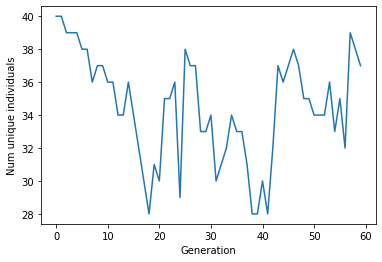

In [10]:
list_num_unique_strat = []
for gen in range(0,logbook[-1]['gen']):
    with open('results/scenario{}/population_gen_{}_scenario{}'.format(scenario_num, gen, scenario_num), 'rb') as f:
        test = pickle.load(f)
    list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in test)]))

fig, ax = plt.subplots()

line1 = ax.plot(range(0, logbook[-1]['gen']), list_num_unique_strat, "-", label="Min Fitness")
ax.set_xlabel("Generation")
ax.set_ylabel("Num unique individuals", color="black")
for tl in ax.get_yticklabels():
    tl.set_color("black")

Note: We prefer to explore much more in the beginning of the search process (to ensure the population coverage and diversity). On the other hand, we prefer more exploitations at the end of search process to ensure the convergence of the population to the global optimum. 

There is just an exception; when population converges to a local optimum, we should (if we can) increase the population diversity to explore other areas.
Too high mutation rate increases the probability of searching more areas in search space, however, prevents population to converge to any optimum solution. On the other hand, too small mutation rate may result in premature convergence (falling to local optima instead of global optimum). In other words, too high mutation rate reduces the search ability of GA to a simple (and dummy!) random walk while a too small mutation rate (without any other facilities such as niching or crowd-avoiding to preserve diversity) almost always fails to a local optimum.

In [15]:
gen = 60 # Select an final generation to visualise result

In [13]:
with open('results/scenario{}/population_gen_{}_scenario{}'.format(scenario_num, gen, scenario_num), 'rb') as f:
    final_pop = pickle.load(f)
    
unique_strat_list = [sum(list(x)) for x in set(tuple(x) for x in final_pop)]

print('Number of unique strategies after {} generation: {}'.format(gen, len(unique_strat_list)))

print('Number of agents in each unique strategy: {}'.format(unique_strat_list))


Number of unique strategies after 60 generation: 37
Number of agents in each unique strategy: [45, 53, 17, 10, 15, 22, 11, 56, 62, 60, 44, 46, 33, 70, 14, 16, 52, 42, 48, 31, 2, 29, 23, 31, 38, 28, 20, 7, 36, 66, 12, 27, 22, 4, 24, 39, 34]


### Number of non-dominated solutions in population

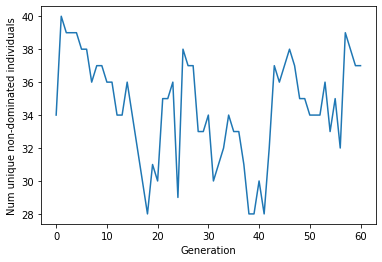

In [14]:
list_num_unique_strat = []
for gen in range(0,len(logbook)):
    with open('results/scenario{}/population_gen_{}_scenario{}'.format(scenario_num, gen, scenario_num), 'rb') as f:
        final_pop = pickle.load(f)
        non_dom = tools.sortNondominated(final_pop, k=len(final_pop), first_front_only=True)[0]
        list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in non_dom)]))

fig, ax = plt.subplots()

line1 = ax.plot(range(0, len(logbook)), list_num_unique_strat, "-", label="Min Fitness")
ax.set_xlabel("Generation")
ax.set_ylabel("Num unique non-dominated individuals", color="black")
for tl in ax.get_yticklabels():
    tl.set_color("black")

In [17]:
print('Number of non-dominated solutions in the population at generation {}:'.format(gen))
len([list(x) for x in set(tuple(x) for x in non_dom)])

Number of non-dominated solutions in the population at generation 60:


37

In [18]:
print('Number of individuals in the HOF:')
len([list(x) for x in set(tuple(x) for x in hof)])

Number of individuals in the HOF:


52

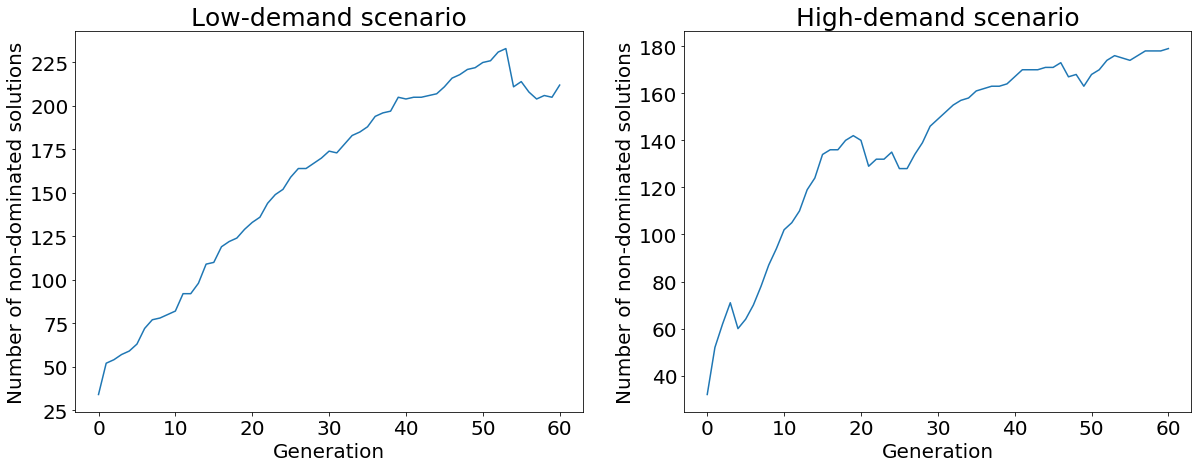

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

ax1 = axes[0]

with open('results/scenario1/logbook_file_scenario1', 'rb') as f:
    logbook = pickle.load(f)
    list_unique_non_dom = []
    for gen in range(0, len(logbook)) :
        hof = logbook[gen]['hof']
        list_unique_non_dom.append(len([list(x) for x in set(tuple(x) for x in hof)]))

    line1 = ax1.plot(range(0, len(logbook)), list_unique_non_dom, "-", label="Min Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Number of nondominated solutions", color="black")
    for tl in ax.get_yticklabels():
        tl.set_color("black")

    ax1.set_ylabel("Number of non-dominated solutions",  fontsize =20)
    ax1.set_xlabel("Generation",  fontsize =20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.set_title('Low-demand scenario', fontsize = 25, )
    
    
ax2 = axes[1]

with open('results/scenario2/logbook_file_scenario2', 'rb') as f:
    logbook = pickle.load(f)
    list_unique_non_dom = []
    for gen in range(0, len(logbook)) :
        hof = logbook[gen]['hof']
        list_unique_non_dom.append(len([list(x) for x in set(tuple(x) for x in hof)]))


    line1 = ax2.plot(range(0, len(logbook)), list_unique_non_dom, "-", label="Min Fitness")
    ax2.set_xlabel("Generation")
    ax2.set_ylabel("Number of nondominated solutions", color="black")
    for tl in ax.get_yticklabels():
        tl.set_color("black")

    ax2.set_ylabel("Number of non-dominated solutions",  fontsize =20)
    ax2.set_xlabel("Generation",  fontsize =20)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.set_title('High-demand scenario', fontsize = 25, )

plt.show()



# Visualise final population after running the final evaluation

In [23]:
# Get the last hof 
with open('results/scenario{}/final_HOF_scenario{}'.format(scenario_num,scenario_num), 'rb') as f:
    eval_pop = pickle.load(f)

In [24]:
# Get the hof individuals

print('There are {} individuals in final evaluated pop'.format(len(eval_pop)))
for ind in eval_pop:
    print(sum(ind),ind.fitness.values)

There are 221 individuals in final evaluated pop
54 (4.231570512820513, 53.0, 0.720192051213657, 244174.0)
39 (6.499191374663073, 39.0, 3.120832221925847, 181972.0)
53 (5.472663614328036, 52.0, 2.0272072552680718, 240883.0)
25 (7.533728687916976, 24.0, 3.1741797812750066, 117783.0)
31 (5.564674397859054, 31.0, 2.160576153640971, 150799.0)
36 (6.711960943856794, 36.0, 3.520938917044545, 176445.0)
22 (14.855432780847146, 22.0, 11.60309415844225, 105433.0)
47 (4.121015348288076, 46.0, 0.480128034142438, 222721.0)
56 (3.9027777777777777, 55.0, 0.5334755934915978, 257521.0)
58 (5.8358613217768145, 57.0, 2.9341157642037876, 271693.0)
25 (4.114670380687094, 24.0, 0.2133902373966391, 111456.0)
12 (17.384069400630914, 12.0, 5.361429714590558, 60497.0)
10 (14.435175879396985, 10.0, 4.321152307281942, 54901.0)
16 (10.680032076984764, 16.0, 5.734862630034677, 78035.0)
27 (8.551001540832049, 27.0, 4.80128034142438, 128742.0)
59 (5.404146472805601, 58.0, 2.40064017071219, 268925.0)
7 (11.23686105111

In [25]:
def is_dominated(x,y):
    """Returns whether or not *wvalues2* dominates *wvalues1*.
    :param wvalues1: The weighted fitness values that would be dominated.
    :param wvalues2: The weighted fitness values of the dominant.
    :returns: :obj:`True` if wvalues2 dominates wvalues1, :obj:`False`
              otherwise.
    """
    return tools.emo.isDominated(x.fitness.wvalues, y.fitness.wvalues)

## Obtaining the nondominated front (1st front)

In [26]:
# find the non dominant front (set of solutions)
non_dom = tools.sortNondominated(eval_pop, k=len(eval_pop), first_front_only=True)[0]

print('There are {} non-dominated individuals'.format(len([tuple(ind) for ind in non_dom])))
print('There are {} unique non-dominated individuals'.format(len(set([tuple(ind) for ind in non_dom]))))


There are 124 non-dominated individuals
There are 124 unique non-dominated individuals


In [27]:
#The crowding distance is used to select 12 solutions from all the non_dominated front that are rather far 
#from each other


# 1 -  Assign a CrowdingDist to the hof non dominated individuals
tools.emo.assignCrowdingDist(non_dom)

# 2 -  Choose k=12 individuals from hof non dom based on crowding distance (since they all are non-dominated)
# NB: len(hof) and k must me multiples of 4.

#chosen_pop = tools.emo.selTournamentDCD(non_dom[:], 12) 
#len(chosen_pop)

# OR
chosen_pop = non_dom[:]

### Plot parto front

In [28]:
# The points of the frontier need to be in order of x axis increasing so I can draw the curve between them
liste = [ind.fitness.values for ind in chosen_pop]
sorted_hof = sorted(liste, key=lambda tup: tup[0])
print(sorted_hof)

[(3.5497465990930914, 58.0, 0.05334755934915977, 254867.0), (3.6424759871931696, 59.0, 0.08002133902373967, 273583.0), (3.773479188900747, 59.0, 0.240064017071219, 277514.0), (3.7798826040554965, 56.0, 0.4267804747932782, 249223.0), (3.804481194985329, 54.0, 0.40010669511869834, 247848.0), (3.8380469583778014, 56.0, 0.480128034142438, 260752.0), (3.851160309415844, 55.0, 0.40010669511869834, 252816.0), (3.8764674493062965, 55.0, 0.240064017071219, 258156.0), (3.9733262203254203, 54.0, 0.4534542544678581, 249228.0), (3.9734710974588103, 41.0, 0.08002133902373967, 175989.0), (4.0005336179295625, 56.0, 0.6935182715390771, 263735.0), (4.000928505106778, 25.0, 0.16004267804747935, 114108.0), (4.04279811097993, 48.0, 0.480128034142438, 231174.0), (4.047504670402989, 55.0, 0.6668444918644971, 258839.0), (4.080283353010626, 46.0, 0.480128034142438, 219483.0), (4.114670380687094, 24.0, 0.2133902373966391, 111456.0), (4.121015348288076, 46.0, 0.480128034142438, 222721.0), (4.1281024819855885, 50

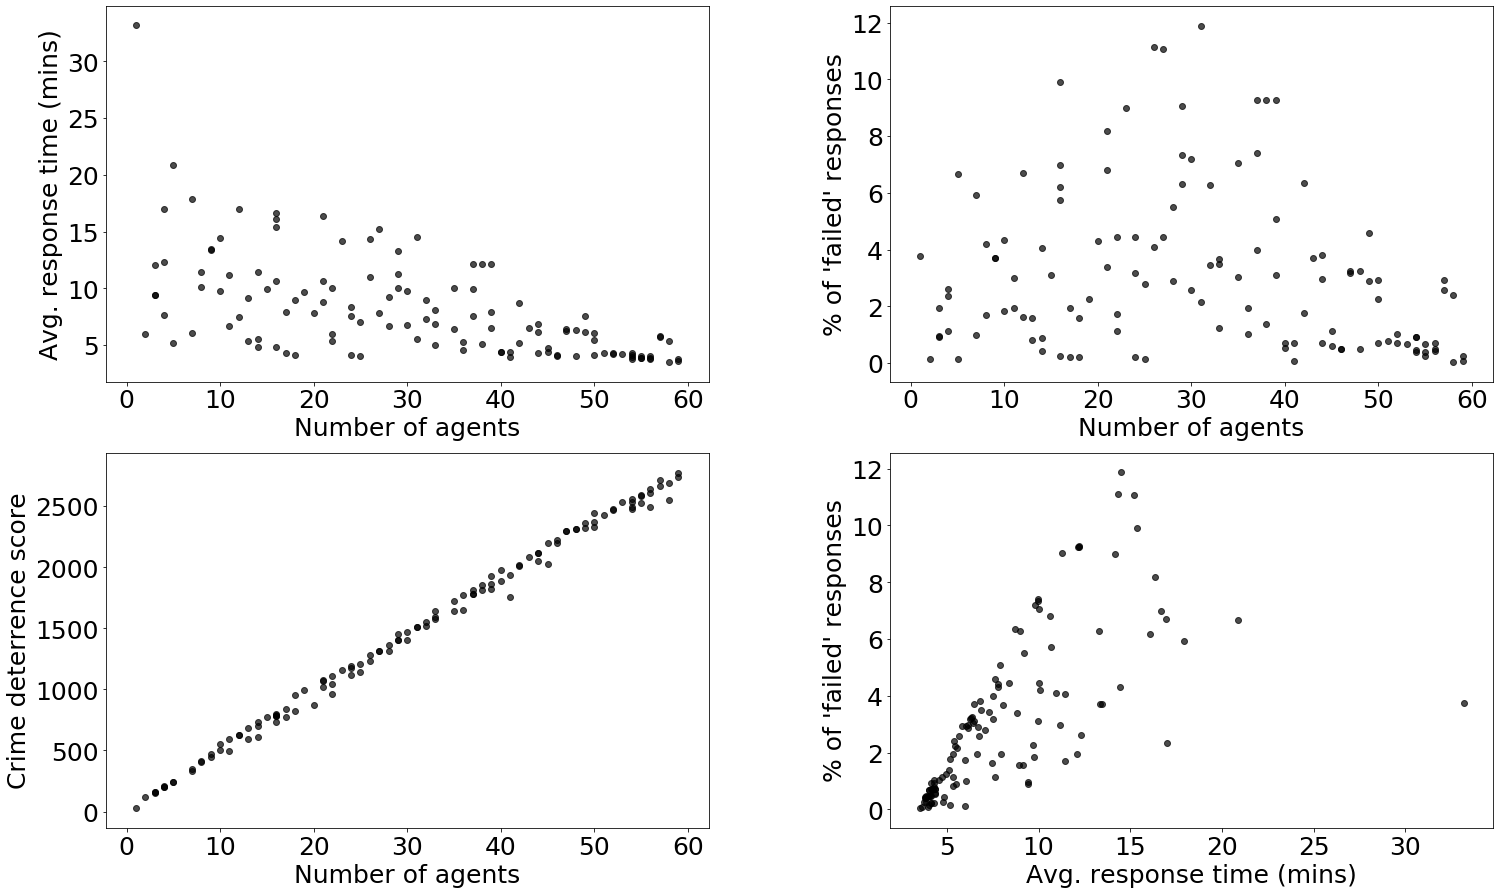

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))
fig.tight_layout(h_pad=5, w_pad=15)

## Response time
ax1 = axes[0][0]
for ind in non_dom:
    ax1.scatter(ind.fitness.values[1], ind.fitness.values[0], c='black', alpha=0.7)
ax1.set_ylabel("Avg. response time (mins)",  fontsize =25)
ax1.set_xlabel("Number of agents",  fontsize =25)
ax1.tick_params(axis='y', labelsize=25)
ax1.tick_params(axis='x', labelsize=25)
ax1.set_title('', fontsize = 30, )


# Percentage failed responses
ax2 = axes[0][1]
for ind in non_dom:
    ax2.scatter(ind.fitness.values[1], ind.fitness.values[2], c='black', alpha=0.7)
ax2.set_ylabel("% of 'failed' responses",  fontsize =25)
ax2.set_xlabel("Number of agents",  fontsize =25)
ax2.tick_params(axis='y', labelsize=25)
ax2.tick_params(axis='x', labelsize=25)
ax2.set_title('', fontsize = 30, )

ax3 = axes[1][0]
for ind in non_dom:
    # divide by 100 for the 100 shifts
    ax3.scatter(ind.fitness.values[1], ind.fitness.values[3]/100, c='black', alpha=0.7)
ax3.set_ylabel("Crime deterrence score",  fontsize =25)
ax3.set_xlabel("Number of agents",  fontsize =25)
ax3.tick_params(axis='y', labelsize=25)
ax3.tick_params(axis='x', labelsize=25)
ax3.set_title('', fontsize = 30, )


ax4 = axes[1][1]
for ind in non_dom:
    ax4.scatter(ind.fitness.values[0], ind.fitness.values[2], c='black', alpha=0.7)
ax4.set_xlabel("Avg. response time (mins)",  fontsize =25) # ms is size of the dot
ax4.set_ylabel("% of 'failed' responses",  fontsize =25)
ax4.tick_params(axis='y', labelsize=25)
ax4.tick_params(axis='x', labelsize=25)
ax4.set_title('', fontsize = 30, )

plt.show()

In [31]:
import pandas as pd
df = pd.DataFrame([ind.fitness.values for ind in non_dom], columns = ['resp_time', 'num_agents', 'percent_failed', 'Deterrence'])
df['ind'] = df.index.values
df['Deterrence'] = df['Deterrence']/100 # for 100 shift
df

resp_time  num_agents  percent_failed  Deterrence  ind
0     6.499191        39.0        3.120832     1819.72    0
1     7.533729        24.0        3.174180     1177.83    1
2     5.564674        31.0        2.160576     1507.99    2
3     4.121015        46.0        0.480128     2227.21    3
4     5.835861        57.0        2.934116     2716.93    4
..         ...         ...             ...         ...  ...
119  13.437031         9.0        3.707655      472.93  119
120  13.274908        29.0        6.295012     1405.44  120
121  10.041932        35.0        7.041878     1722.63  121
122   6.860862        33.0        3.494265     1591.78  122
123  17.024138         4.0        2.347293      211.04  123

[124 rows x 5 columns]

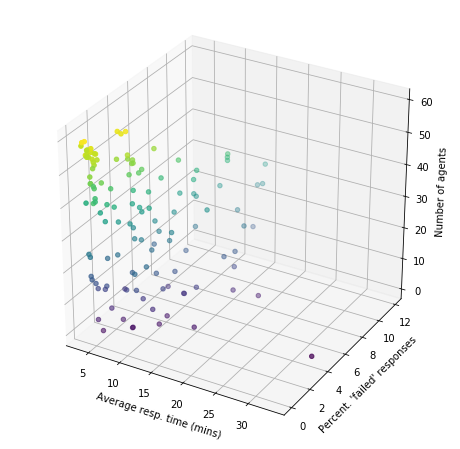

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['resp_time'], df['percent_failed'], df['num_agents'], c=df['Deterrence'])

ax.set_xlabel('Average resp. time (mins)')
ax.set_ylabel("Percent. 'failed' responses")
ax.set_zlabel('Number of agents')


plt.show()

In [33]:
import plotly.express as px
#df = px.data.iris()


myfig = px.scatter_3d(df, x='resp_time', y='percent_failed', z='num_agents',
              color='Deterrence',  labels={'resp_time': 'Avg. resp. time (mins)', 'num_agents': 'Number of agents',
                                                     'percent_failed': "% 'failed' responses"})
#text='ind',
myfig.update_scenes(xaxis_autorange="reversed", yaxis_autorange="reversed")

myfig.show()

## Selecting a portfolio of N solutions

In [34]:
len(non_dom)

124

In [35]:
#The crowding distance is used to select 12 solutions from all the non_dominated front that are rather far 
#from each other
import random 
random.seed(2019)

# 1 -  Assign a CrowdingDist to the hof non dominated individuals
tools.emo.assignCrowdingDist(non_dom)

# 2 -  Choose k=12 individuals from hof non dom based on crowding distance (since they all are non-dominated)
# NB: len(hof) and k must me multiples of 4.

chosen_pop = tools.emo.selTournamentDCD(non_dom[:88], 32) # CHANGE HERE
len(chosen_pop)

32

In [36]:
### VISUALISING BEST CONFIGS - RESPONSE TIME!

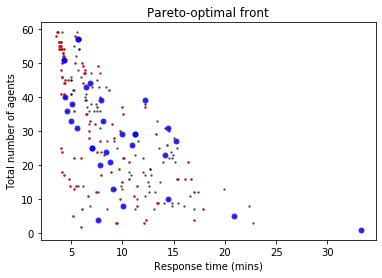

In [37]:
fig, ax = plt.subplots()
for ind in eval_pop:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', ms=3, alpha=0.5)
for ind in non_dom:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'r.', ms=3, alpha=0.5)
for ind in chosen_pop:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'bo', alpha=0.74, ms=5)
ax.set_xlabel("Response time (mins)")
ax.set_ylabel("Total number of agents")
plt.title('Pareto-optimal front')
plt.show()

In [40]:
import pandas as pd
df2 = pd.DataFrame([ind.fitness.values for ind in chosen_pop], columns = ['resp_time', 'num_agents', 'percent_failed', 'Deterrence'])
df2['num_agents'] = [sum(ind) for ind in chosen_pop] # Fix issue with number of agents
#df2['ind'] = df2.index.values
df2['Deterrence'] = df2['Deterrence']/100 # for 100 shift
df2.sort_values(by=['num_agents'], inplace = True)
df2 = df2[['num_agents', 'resp_time', 'percent_failed', 'Deterrence']]
df2.drop_duplicates(subset=['num_agents'], inplace= True)

df2 = df2.round(2)
df2['num_agents'] = df2.num_agents.astype('int')
df2

num_agents  resp_time  percent_failed  Deterrence
11           1      33.23            3.76       29.36
6            4       7.63            1.12      201.99
21           5      20.85            6.67      239.04
24           9      10.09            4.19      416.74
23          10      14.44            4.32      549.01
26          13       9.13            1.57      682.38
1           20       7.80            4.29      868.66
16          21       8.84            3.39     1023.14
31          23      14.18            8.99     1160.28
17          25       8.37            4.45     1194.95
2           26      10.96            4.08     1233.22
15          27      15.22           11.07     1317.87
28          29       9.99            7.34     1405.69
18          30      11.27            9.04     1453.00
9           31      14.50           11.87     1509.00
22          33       4.97            1.25     1579.83
12          37       4.58            1.04     1654.06
10          39       5.10            1.39     1812.90
14          40       7.89            5.07     1866.58
0           41       4.37            0.53     1974.90
25          44       6.50            3.71     2081.64
19          52       4.29            0.77     2431.09
7           58       5.67            2.59     2664.72

## Show spatial placements of some of the solutions


In [54]:
def plotOneConfig(config, ax, legend) :

    config = [v for v in config] # convert Individual object to list
    
    precincts = gpd.read_file('../../../data/precincts/precincts.shp')
    scas = gpd.read_file('../../../data/patrol_beats/patrol_beats.shp')

    # create new column with has_patrol (config)
    scas['has_patrol'] = config
    scas.loc[:,['name']] = scas.name.astype('int64')
    
    title = '{} agents'.format(scas.has_patrol.sum())
    
    scas['has_patrol'] = scas['has_patrol'].astype('str')

    # create simple linear colormap that maps grey to blue
    cmap = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'white'), (1, '#86beda')])
    

    scas.plot(ax=ax, column='has_patrol', edgecolor= 'black', legend=legend, cmap=cmap)
    scas.apply(lambda x: ax.annotate(s=int(x['name']), xy=x.geometry.centroid.coords[0], ha='center', fontfamily = 'sans-serif', weight='bold', fontsize=10),axis=1);
            
    #Precincts
    precincts.boundary.plot(ax=ax, linewidth = 2, color = 'black', zorder = 1)

    ax.set_title(title, fontsize = 30, )

    ax.axis('off')
    
    return ax.get_legend()
    

"""def plotConfigs(list_configs, file_title ) :
        

    fig, axes = plt.subplots(3,2, figsize=(30, 30))
    
    
    plotOneConfig(list_configs[0], axes[0][0], legend=False)
    plotOneConfig(list_configs[1], axes[0][1], legend=False)
    plotOneConfig(list_configs[2], axes[1][0], legend=False)
    plotOneConfig(list_configs[3], axes[1][1], legend=False)
    plotOneConfig(list_configs[4], axes[2][0], legend=False)
    plotOneConfig(list_configs[5], axes[2][1], legend=False)

 
    handles = [
        Patch(color='#86beda', label='Staffed', fill=True) 
    ]

    fig.legend(handles=handles,
       loc="lower center",
       #bbox_to_anchor=(0., 0.),
       fontsize=30,
       borderaxespad=0.1,
    );

    # remove frame legend
    #leg.get_frame().set_linewidth(0.0)

    #move legend to an empty space

    plt.savefig(file_title, bbox_inches = 'tight')

    plt.show()"""

'def plotConfigs(list_configs, file_title ) :\n        \n\n    fig, axes = plt.subplots(3,2, figsize=(30, 30))\n    \n    \n    plotOneConfig(list_configs[0], axes[0][0], legend=False)\n    plotOneConfig(list_configs[1], axes[0][1], legend=False)\n    plotOneConfig(list_configs[2], axes[1][0], legend=False)\n    plotOneConfig(list_configs[3], axes[1][1], legend=False)\n    plotOneConfig(list_configs[4], axes[2][0], legend=False)\n    plotOneConfig(list_configs[5], axes[2][1], legend=False)\n\n \n    handles = [\n        Patch(color=\'#86beda\', label=\'Staffed\', fill=True) \n    ]\n\n    fig.legend(handles=handles,\n       loc="lower center",\n       #bbox_to_anchor=(0., 0.),\n       fontsize=30,\n       borderaxespad=0.1,\n    );\n\n    # remove frame legend\n    #leg.get_frame().set_linewidth(0.0)\n\n    #move legend to an empty space\n\n    plt.savefig(file_title, bbox_inches = \'tight\')\n\n    plt.show()'

In [49]:
"""subset_configs = []
for num in [5, 10, 31, 46, 51, 60] : # CHANGE HERE
    first_config = list(ind for ind in chosen_pop if sum(ind) == num)[0]
    print(first_config.fitness.values[1])
    print(sum(first_config))
    subset_configs.append(first_config)
    
plotConfigs(subset_configs, file_title = './images/GA_portfolio_scenario{}.png'.format(scenario_num))
"""

"subset_configs = []\nfor num in [5, 10, 31, 46, 51, 60] : # CHANGE HERE\n    first_config = list(ind for ind in chosen_pop if sum(ind) == num)[0]\n    print(first_config.fitness.values[1])\n    print(sum(first_config))\n    subset_configs.append(first_config)\n    \nplotConfigs(subset_configs, file_title = './images/GA_portfolio_scenario{}.png'.format(scenario_num))\n"

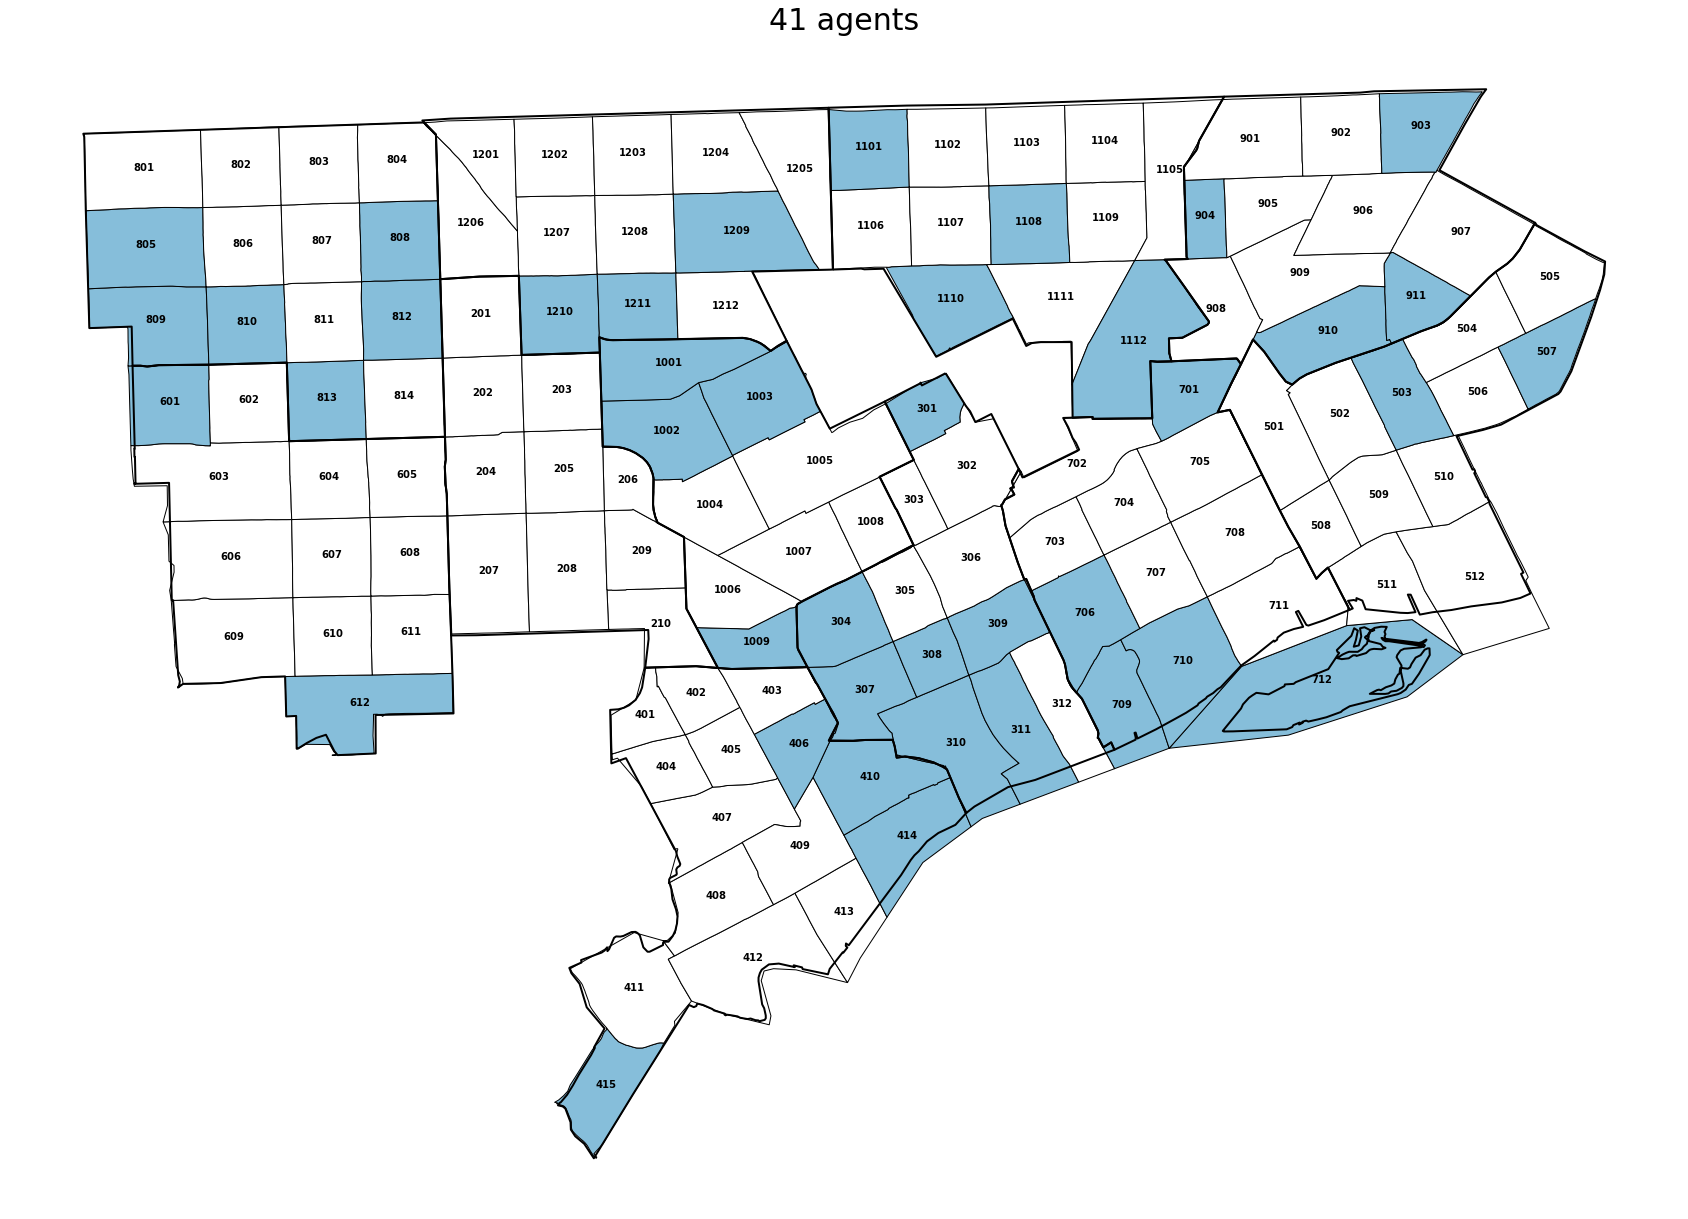

In [53]:
fig, axes = plt.subplots(1, figsize=(30, 30))

# Plot the first config in chosen_pop for example
plotOneConfig(chosen_pop[0], axes, legend=False)